In [ ]:
#! pip install geopandas
#! pip install coordinates-converter
from coordinates.converter import CoordinateConverter, WGS84, L_Est97
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Loading & shaping data

In [ ]:
df = gpd.read_file('/content/drive/MyDrive/Sustainability/Data/RRN/VSMAP_TOUT.shp')
df[['dep', 'route', '1', '2', '3', '4']] = df.route.str.split(" ", expand = True)
df = df.drop(columns = ['1', '2', '3', '4'])

df2 =gpd.read_file('/content/drive/MyDrive/Sustainability/Data/RRN/BORNAGE_TOUT.shp')

regions = gpd.read_file('/content/drive/MyDrive/Sustainability/Data/regions/regions_2016.shp')
regions.drop(regions[regions['nomnewregi']=='Corse'].index, inplace=True)

traffic = gpd.read_file('/content/drive/MyDrive/Sustainability/Data/traffic/TMJA2018.shp')

df3 = pd.read_csv('/content/drive/MyDrive/Sustainability/Data/depreg.csv')
df3 = df3.drop(columns = ['dep_name'])

zonesPL = gpd.read_file('/content/drive/MyDrive/Sustainability/Data/airesPL/Aires_logistiques_denses.shp')

stations = pd.read_csv('/content/drive/MyDrive/Sustainability/Data/Stations.csv')
stations[['lat', 'lon', '1']] = stations.Coordinates.str.split(",", expand = True)
stations = stations.drop(columns=['1'])
stations = stations.drop('H2 Conversion', axis=1)


In [ ]:
#stations.drop(columns = ['Coordinates'], inplace=True)
stations.head()

In [ ]:
stations['lat'] = pd.to_numeric(stations['lat'])
stations['lon'] = pd.to_numeric(stations['lon'])
stations.drop(stations[stations['lat'] <= 0].index, inplace=True)
stations.drop(stations[stations['lon'] <= 0].index, inplace=True)

In [ ]:
converter = CoordinateConverter
stations['newCoord'] = np.repeat('a', len(stations))
for i, row in stations.iterrows():
  wgs_point = WGS84( stations['lat'].loc[i], stations['lon'].loc[i] )
  stations['newCoord'].loc[i] = converter.wgs84_to_l_est97(wgs_point)

In [ ]:
stations['newCoord'] = stations['newCoord'].astype(str).str.replace('(','')
stations['newCoord'] = stations['newCoord'].astype(str).str.replace(')','')
stations['newCoord'] = stations['newCoord'].astype(str).str.replace('L_Est97x=','')
stations['newCoord'] = stations['newCoord'].astype(str).str.replace('y=','')
stations[['lat2', 'lon2']] = stations.newCoord.str.split(",", expand = True)

<ipython-input-331-ffb0f20c9fbf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stations['newCoord'] = stations['newCoord'].astype(str).str.replace('(','')
<ipython-input-331-ffb0f20c9fbf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stations['newCoord'] = stations['newCoord'].astype(str).str.replace(')','')


In [ ]:
x = stations.lat2.drop(stations[stations['lat2']=='nan'].index)
x = pd.to_numeric(x)
y = stations.lon2.drop(stations[stations['lat2']=='nan'].index)
y = pd.to_numeric(y)
x = x.values
y = y.values

In [ ]:
final = pd.merge(df, df3, left_on='dep', right_on='num_dep')

In [ ]:
traffic2 = traffic[['tmja','pctPL', 'geometry', 'depPrD', 'route']]
traffic2.drop(traffic2[traffic2['pctPL']==0.0].index, inplace=True)
traffic2['nbPL'] = traffic2['tmja']*(traffic2['pctPL']/100)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


# Plot the frequency of usage of roads

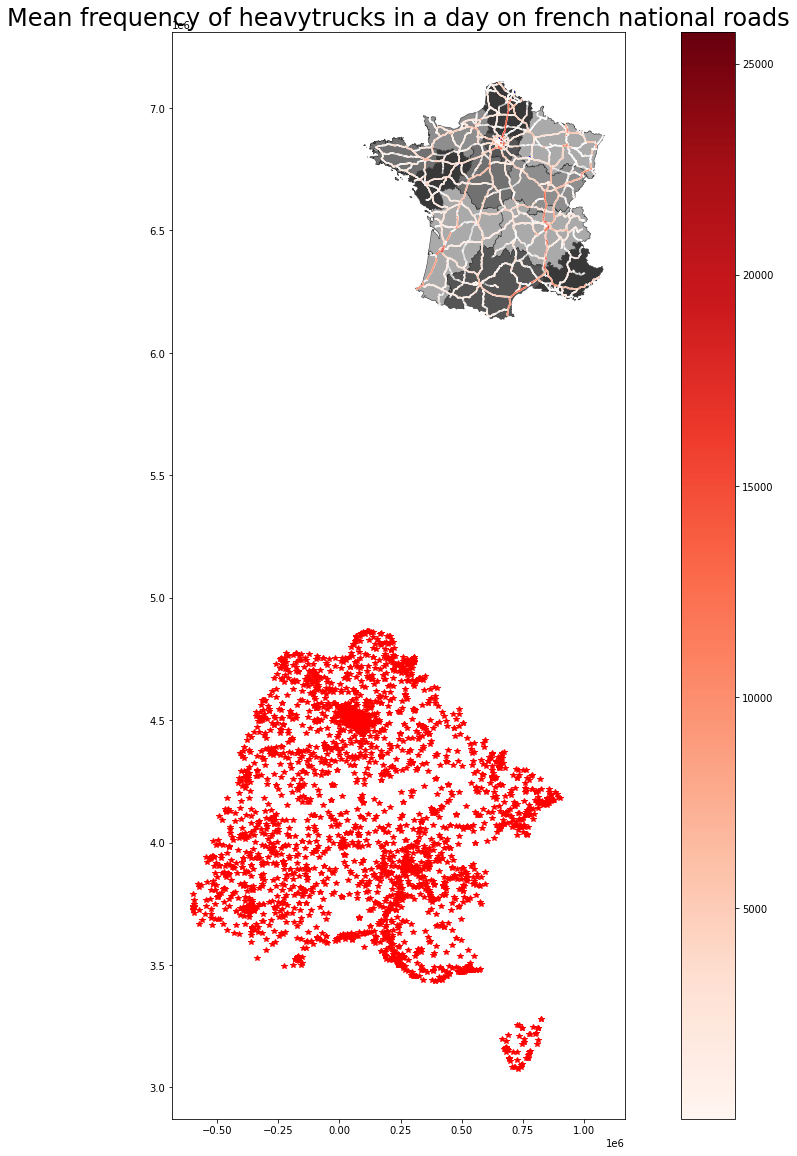

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 20))
#ax.axis('off')
ax.set_title('Mean frequency of heavytrucks in a day on french national roads',
             fontdict={'fontsize': '24', 'fontweight' : '3'})
rgba_array = mpl.cm.binary(np.linspace(0,1,num=10,endpoint=True))
extract_rgba_array_255 = rgba_array[3:8,0:3]
fig = regions.plot(column='id_newregi', cmap=mpl.colors.ListedColormap(extract_rgba_array_255), linewidth=0.5, ax=ax, edgecolor='0.2',legend=False)
final.plot(color='white', ax=ax)
fig2 = traffic2.plot(column = 'nbPL', cmap='Reds', ax=ax, legend=True)
fig3 = zonesPL.plot(color = 'blue', ax=ax)
ax.plot(x, y, 'r*')


In [ ]:
zonesPL.geometry.describe()

count                                                   382
unique                                                  382
top       POLYGON ((306902.3 6698606.12, 306928.37 66988...
freq                                                      1
Name: geometry, dtype: object

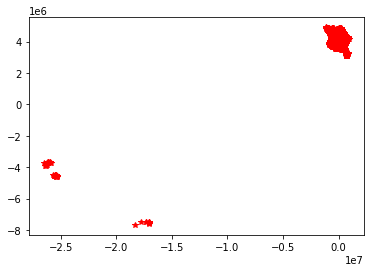

In [ ]:
plt.plot(x, y, 'r*')

,URL,Station de service,Ville,Adresse,Energies,Lavage,Paiement,Produits & Services,Services,Club TotalEnergies,Truck,lat,lon,nexCoord,newCoord
0,https://store.totalenergies.fr/fr_FR/NF059116,RELAIS SERIGUETTE,AIMARGUES,"2 bis. ROUTE DE LA PETITE CAMARGUE , 30470 AI...","AdBlue Truck, Excellium 98, Excellium Diesel, ...",NaN,"Routex, UTA, DKV, Mobility de TotalEnergies, M...","AdBlue Truck,","Café, Justbip, Wifi, AdBlue bidon,","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...","Truck, Truck store,",43.696138,4.200745,0,"(75913.2, 3620288.37)"
1,https://store.totalenergies.fr/fr_FR/NF080036,RELAIS DEVEZE,BEZIERS,"1 AVENUE DE LA DEVEZE , 34500 BEZIERS, FRANCE","AdBlue Truck, Super Ethanol e85, Excellium 98,...","Lavage Haute Pression, Aspirateur, Lavage à Ro...","UTA, Carte Jubileo, MOL, Carte Wash, American ...","AdBlue Truck,","FDJ, Café, Lavage à Rouleaux, Justbip, Gonflag...","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...","Truck, Truck store,",43.331501,3.247402,0,"(-88169.8, 3607805.46)"
2,https://store.totalenergies.fr/fr_FR/NF080198,RELAIS SAINT MATHURIN,ALLONNE,"ZAC SAINT MATHURIN - RD 1001 , 60000 ALLONNE,...","Borne DC175 kW, AdBlue Truck, Excellium 98, Ex...","Aspirateur, Lavage à Rouleaux,","Visa, American Express, Mastercard, Eurotrafic...","AdBlue Truck,","Café, Lavage à Rouleaux, Gonflage, Wifi, Justb...","Assistance Club 10 Jours, Jauge Cadeau, Cagnot...","Truck, Pompes PL,",49.409445,2.128150,0,"(66075.47, 4611323.48)"
3,https://store.totalenergies.fr/fr_FR/NF080197,REL.LORRAINE LES RAPPES,SANDAUCOURT,"AUT.A31-LORRAINE LES RAPPES , 88170 SANDAUCOU...","Borne AC43/DC50 kW, Borne DC175 kW, SP95 e10, ...",NaN,"Mobility de TotalEnergies, Carte Jubileo, Cart...","AdBlue Truck,","Défibrillateur, Café, Wifi, Autoroutière, Toil...","Assistance Club 30 Jours, Club Truck, Cagnotte...","Truck, Pompes PL,",48.265939,5.863884,0,"(558516.96, 4222347.56)"
4,https://store.totalenergies.fr/fr_FR/NF058916,REL.MORAINVILLIERS NORD,MORAINVILLIERS,"A13 - AIRE DE MORAINVILLIERS NORD , 78630 MOR...","Diesel, GPL, SP95 e10, Excellium 98, GNR, Exce...",NaN,"Mobility de TotalEnergies, MOL, American Expre...","AdBlue Truck,","Click & Collect Lyf, Toilettes, Défibrillateur...","Assistance Club 30 Jours, Club Truck, Cagnotte...","Truck, Parking PL, Truck store,",48.941143,1.954339,0,"(10913.54, 4549526.93)"
